In [1]:
!pip install -r requirements.txt

You should consider upgrading via the '/Users/odhrandaly/dev/self-driving-lego-truck/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
print('AI Pipeline START')

AI Pipeline START


In [3]:
print('Setting UP')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from sklearn.model_selection import train_test_split


Setting UP


In [4]:
#### STEP 1 - INITIALIZE DATA
from utlis import importDataInfo
path = 'DataCollected'
startFolderNumber = 0
endFolderNumber = len(os.listdir(path)) // 2
data = importDataInfo(path, startFolderNumber, endFolderNumber)
print(data.head())

0:79 1:100 2:117 3:117 4:117 5:168 6:199  
Total Images Imported 897
                    Center  Steering
0  IMG0/image_13_55_44.jpg     163.0
1  IMG0/image_13_55_45.jpg     163.0
2  IMG0/image_13_55_46.jpg     163.0
3  IMG0/image_13_55_47.jpg     163.0
4  IMG0/image_13_55_48.jpg     164.0


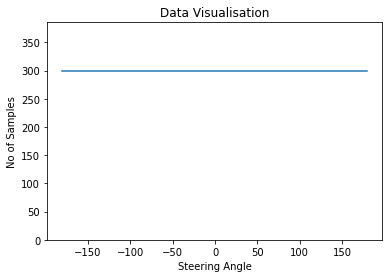

Removed Images: 67
Remaining Images: 830


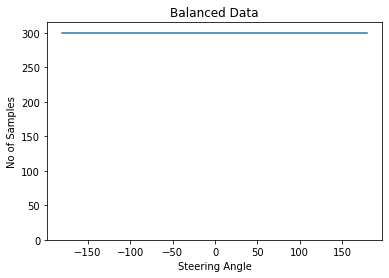

In [5]:
#### STEP 2 - VISUALIZE AND BALANCE DATA
from utlis import balanceData
data = balanceData(data,display=True)

In [6]:
#### STEP 3 - PREPARE FOR PROCESSING
from utlis import loadData
imagesPath, steerings = loadData(path,data)
# print('No of Path Created for Images ',len(imagesPath),len(steerings))
# cv2.imshow('Test Image',cv2.imread(imagesPath[5]))
# cv2.waitKey(0)

In [7]:
#### STEP 4 - SPLIT FOR TRAINING AND VALIDATION
xTrain, xVal, yTrain, yVal = train_test_split(imagesPath, steerings,
                                              test_size=0.2,random_state=10)
print('Total Training Images: ',len(xTrain))
print('Total Validation Images: ',len(xVal))

Total Training Images:  664
Total Validation Images:  166


In [8]:
#### STEP 5 - AUGMENT DATA

#### STEP 6 - PREPROCESS

#### STEP 7 - CREATE MODEL
from utlis import createModel
model = createModel()

In [ ]:
#### STEP 8 - TRAINNING
from utlis import dataGen
history = model.fit(dataGen(xTrain, yTrain, 100, 1),
                                  steps_per_epoch=100,
                                  epochs=10,
                                  validation_data=dataGen(xVal, yVal, 50, 0),
                                  validation_steps=50)

Epoch 1/10
 78/100 [======================>.......] - ETA: 16s - loss: 13044.9893

In [ ]:
#### STEP 9 - SAVE THE MODEL
model.save('model.h5')
print('Model Saved')